# **Molecular Phylogenetics**
## **Multiple Sequences Alignment**

### **1) Programmes used for analysis** <a class="anchor" id="first-bullet"></a>

| Program|
| ------------- |
|clustalw|
|muscle|
|mafft|
|kalign|
|t_coffee|
|prank|
|emboss|
|clustalo|
|blast|

- OS: Windows 11, WSL2 (Ubuntu 22.04)
- CPU: Intel Xeon E5 2670v3 (12 cores/24 threads)
- RAM: 32GB (16GB for WSL2)

In [1]:
from Bio import AlignIO
import os

#### **2) Code to run 6 possible alignment algorithms (clustalw, muscle, mafft, kalign, tcoffee, prank) for 10 DNA sequences (SUP35_10seqs.fa)** <a class="anchor" id="second-bullet"></a>

In [ ]:
! time clustalw -INFILE=data/SUP35_10seqs.fa -OUTPUT=FASTA -OUTFILE=10_DNA_seqs/02_SUP35_10seqs.clustalw.fa

In [ ]:
! time muscle -align data/SUP35_10seqs.fa -output 10_DNA_seqs/02_SUP35_10seqs_muscle.fa

In [ ]:
! time mafft --auto data/SUP35_10seqs.fa >10_DNA_seqs/02_SUP35_10seqs_mafft.fa

In [ ]:
! time kalign <data/SUP35_10seqs.fa >10_DNA_seqs/02_SUP35_10seqs_kalign.fa

In [ ]:
! time t_coffee -infile=data/SUP35_10seqs.fa -outfile=10_DNA_seqs/02_SUP35_10seqs_tcoffee.fa -output=fasta_aln

In [ ]:
# ! time prank -d=data/SUP35_10seqs.fa -o=10_DNA_seqs/02_SUP35_10seqs_prank.fa -codon
# Runs more than 10 minutes...

In [2]:
folder_path = '10_DNA_seqs'
alignment_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.fa')]

for file in alignment_files:
    alignment = AlignIO.read(file, 'fasta')
    alignment_length = alignment.get_alignment_length()
    print(f"Alignment length in file {file}: {alignment_length}")

Длина выравнивания в файле 10_DNA_seqs/02_SUP35_10seqs_tcoffee.fa: 2210
Длина выравнивания в файле 10_DNA_seqs/02_SUP35_10seqs_mafft.fa: 2166
Длина выравнивания в файле 10_DNA_seqs/02_SUP35_10seqs.clustalw.fa: 2148
Длина выравнивания в файле 10_DNA_seqs/02_SUP35_10seqs_kalign.fa: 2152
Длина выравнивания в файле 10_DNA_seqs/02_SUP35_10seqs_muscle.fa: 2333


### **3) Comparative table with running time and DNA alignment quality for the algorithms used above** <a class="anchor" id="third-bullet"></a>.
> Which algorithm is better to use?

|Tool|Time|Alignment length|
|----|----|----------------|
|clustalw|5.641|2148|
|_muscle_|_5.009_|_2333_|
|mafft|4.382|2166|
|kalign|0.475|2152|
|t_coffee|20.869|2210|
|prank|more than 10 minutes|NA|

I think it's best to use `muscle` as it got the longest expressing length!

### **4) What's wrong with the alignment of SUP35_10seqs_strange_aln.fa and how to fix it?** <a class="anchor" id="fourth-bullet"></a>

Let's take a look at this alignment in UGENE

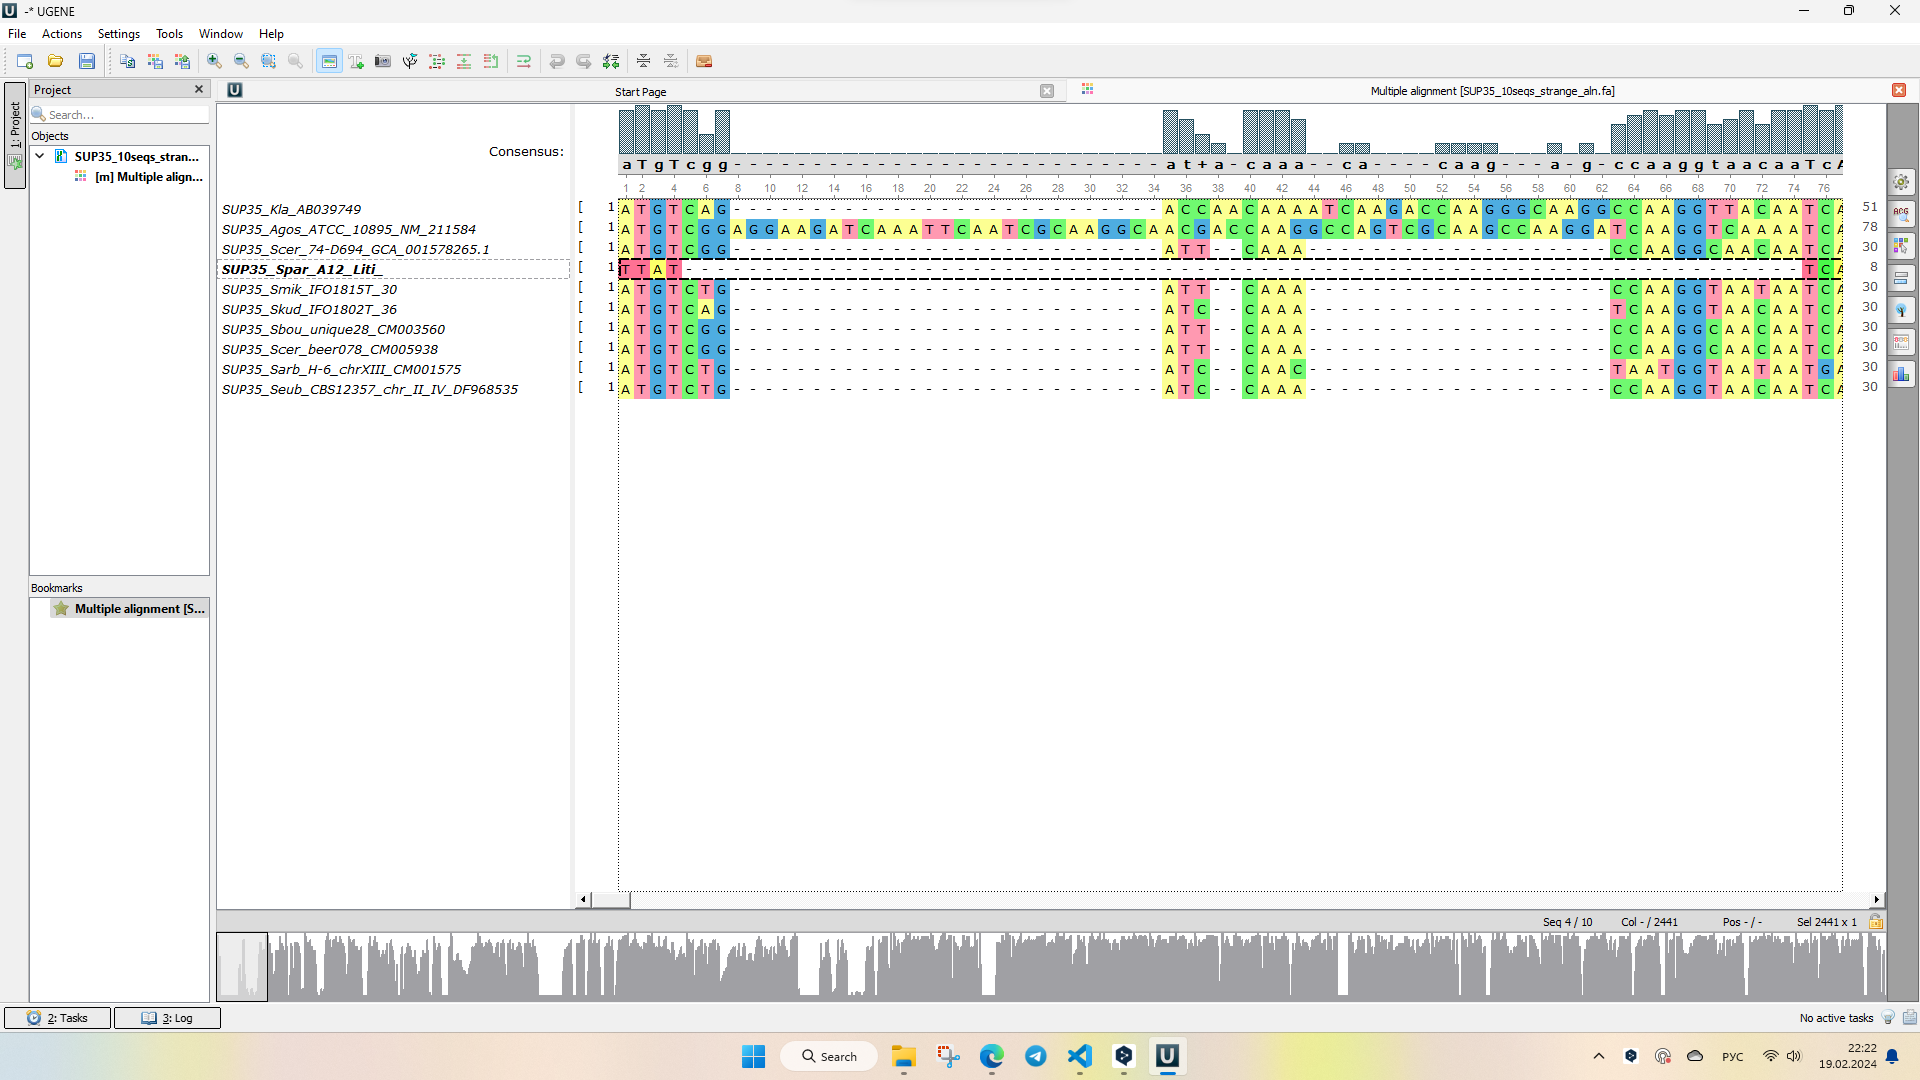

It can be seen that the sequence `SUP35_Spar_A12_Liti_` is strange. Most likely it is a reverse, i.e. it is reverse complementary.

Let's do a couple of youtz, youtz, youtz, youtz.

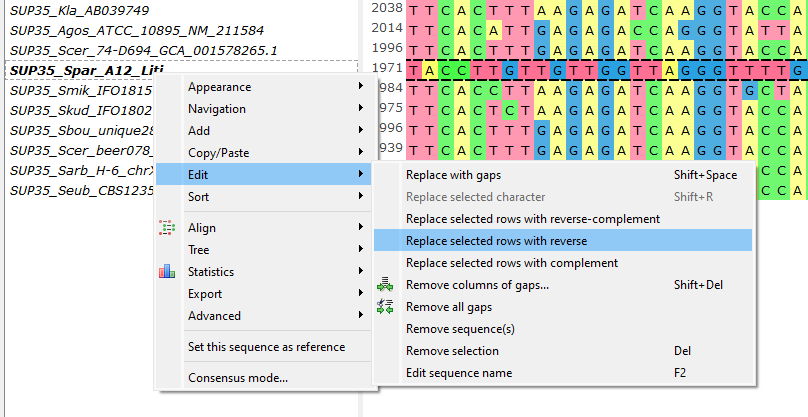

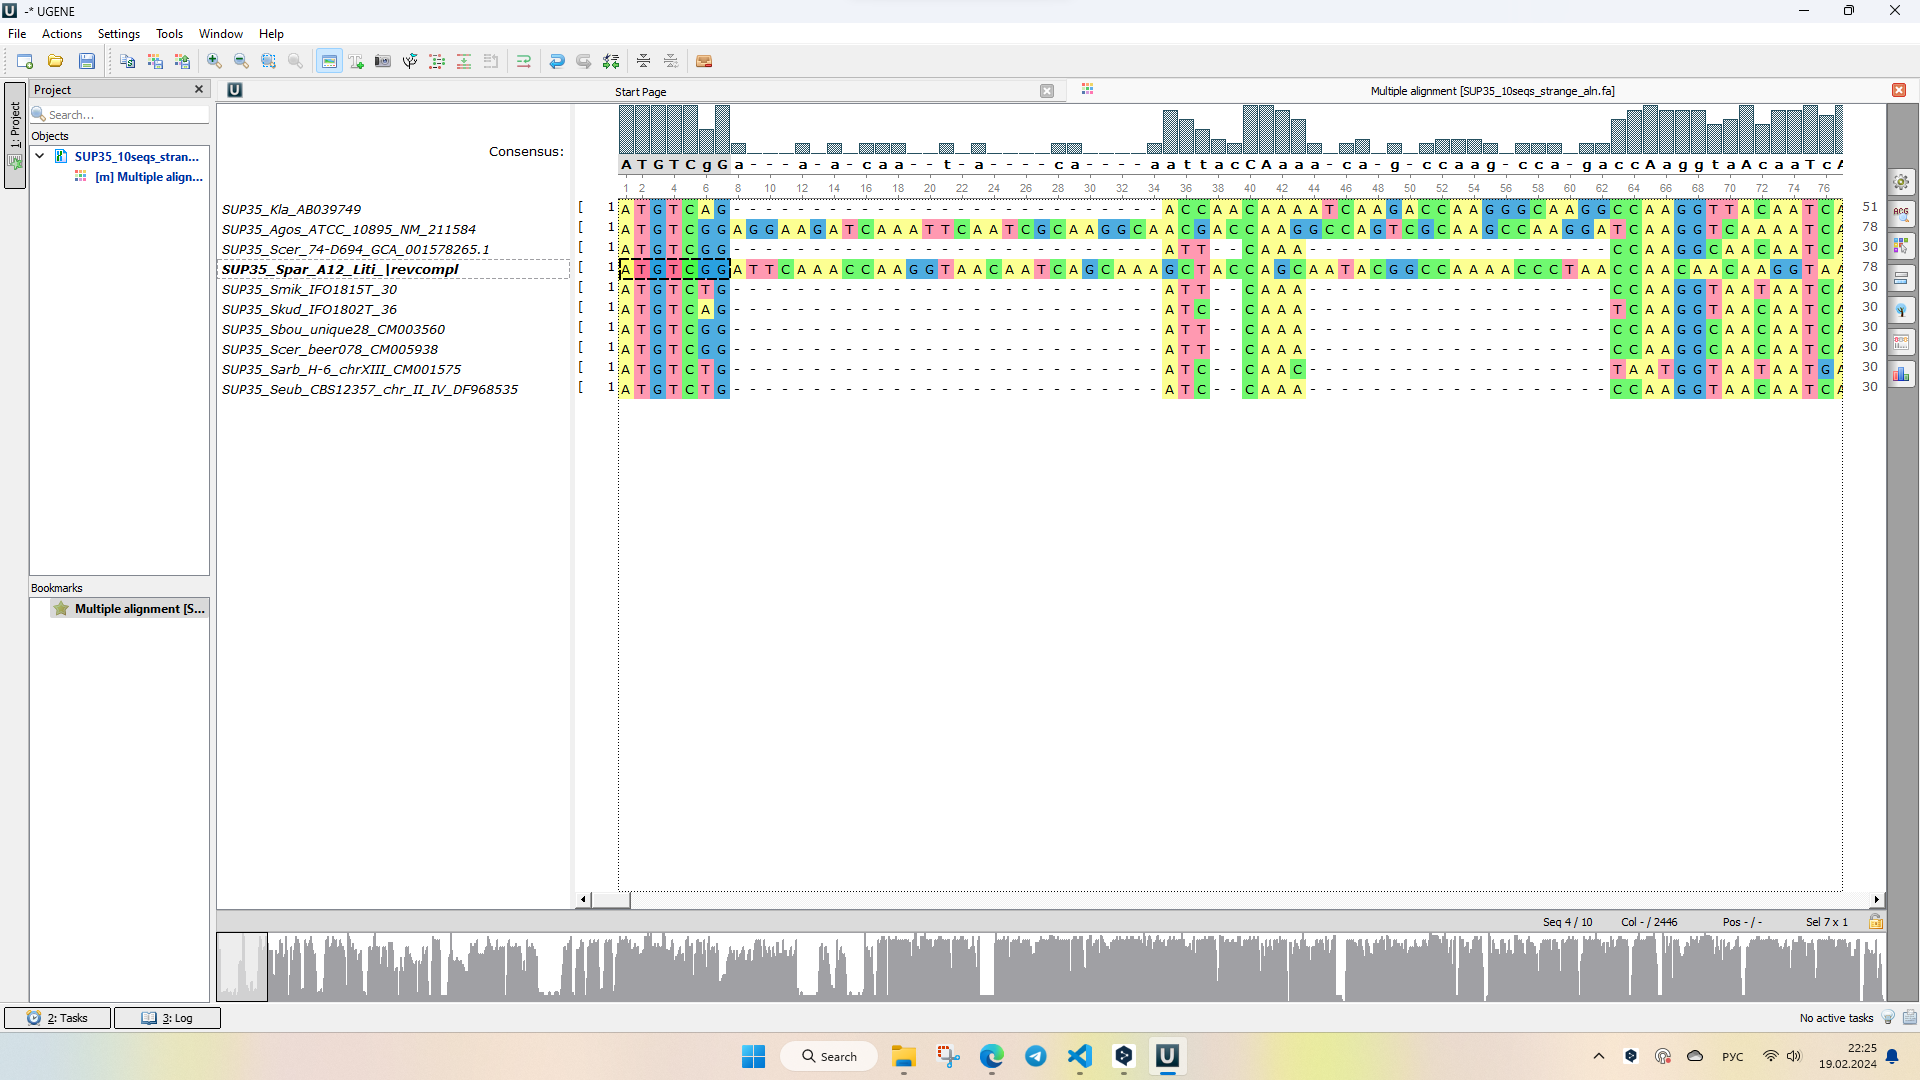

It's beautiful!

### **5) Commands to run 6 possible alignments, but for 250 DNA sequences** <a class="anchor" id="fifth-bullet"></a>

In [ ]:
! time clustalw -INFILE=data/SUP35_250seqs.fa -OUTPUT=FASTA -OUTFILE=250_DNA_seqs/05_SUP35_250seqs.clustalw.fa

In [ ]:
! time muscle -align data/SUP35_250seqs.fa -output 250_DNA_seqs/05_SUP35_250seqs_muscle.fa

In [ ]:
! time mafft --auto data/SUP35_250seqs.fa >250_DNA_seqs/05_SUP35_250seqs_mafft.fa

In [ ]:
! time kalign <data/SUP35_250seqs.fa >250_DNA_seqs/05_SUP35_250seqs_kalign.fa

In [ ]:
# ! time t_coffee -infile=data/SUP35_250seqs.fa -outfile=250_DNA_seqs/05_SUP35_250seqs_tcoffee.fa -output=fasta_aln
# Runs more than 1 hour...

In [ ]:
# ! time prank -d=data/SUP35_250seqs.fa -o=250_DNA_seqs/05_SUP35_250seqs_prank.fa -codon
# Runs more than 1 hour...

In [3]:
folder_path = '250_DNA_seqs'
alignment_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.fa')]

for file in alignment_files:
    alignment = AlignIO.read(file, 'fasta')
    alignment_length = alignment.get_alignment_length()
    print(f"Alignment length in file {file}: {alignment_length}")

Длина выравнивания в файле 250_DNA_seqs/05_SUP35_250seqs.clustalw.fa: 2179
Длина выравнивания в файле 250_DNA_seqs/05_SUP35_250seqs_mafft.fa: 2322
Длина выравнивания в файле 250_DNA_seqs/05_SUP35_250seqs_muscle.fa: 2365
Длина выравнивания в файле 250_DNA_seqs/05_SUP35_250seqs_kalign.fa: 2210


### **6) Comparative table with running time and comments on the quality of the alignment of 250 DNA sequences (SUP35_250seqs.fa)** <a class="anchor" id="sixth-bullet"></a>
> Has our choice of algorithm changed?

|Tool|Time|Alignment length|
|----|----|----------------|
|clustalw|48:41.97|2179|
|muscle|30:44.42|2365|
|_mafft_|_41.962_|_2322_|
|_kalign_|_7.996_|_2210_|
|t_coffee|more than 10 minutes|NA|
|prank|more than 10 minutes|NA|

All my sympathies are on the side of `kalign` for the reason that it aligned 250 sequences in 8 seconds. <br/>
But to be fair, `mafft` is not bad either. Its alignment is longer, and its working time is 42 seconds, not 30 or 48 minutes....

### **7) How to get amino acid sequences (translate)?** <a class="anchor" id="seventh-bullet"></a>
> Give an example of a command to translate to amino acid sequences. What problems might arise?

In our case, in our sequences, everything is simple, for they are all originally open reading frames. That is, they contain only coding sequences, they are correct frames.

#### **Option 1** - `transeq`.

The simplest and fastest variant. With its help we "stupidly" make translation starting from the first nucleotide and up to the last one.

In [4]:
! transeq -sequence data/SUP35_10seqs.fa -outseq data/SUP35_10seqs.t.faa

Translate nucleic acid sequences


#### **Option 2** - `getorf`

Assumes that it has been given the sequence in which the open reading frame is located.<br/>
He's not much of an intellectual.<br/>
Anything that starts with a methionine and ends with a stop codon is an open reading frame!<br/>
It needs to tune our representation, otherwise we get a bunch of rubbish. Especially in fairly long sequences.<br/>
But if we know how long this ugly thing should be and we need a quick protein prediction from our data of some Sanger sequencing, then a very good option!

In [5]:
! getorf -sequence data/SUP35_10seqs.fa -outseq data/SUP35_10seqs.g.faa -noreverse -minsize 500

Find and extract open reading frames (ORFs)


### **8) Commands to run 6 possible alignment variants for 10 protein sequences** <a class="anchor" id="eighth-bullet"></a>

In [ ]:
! time clustalw -INFILE=data/SUP35_10seqs.g.faa -OUTFILE=10_protein_seqs/08_SUP35_10seqs.clustalw.faa -OUTPUT=FASTA -TYPE=protein

In [ ]:
! time clustalo --infile=data/SUP35_10seqs.g.faa --outfile=10_protein_seqs/08_SUP35_10seqs.clustalo.faa --verbose

In [ ]:
! time muscle -align data/SUP35_10seqs.g.faa -output 10_protein_seqs/08_SUP35_10seqs_muscle.faa

In [ ]:
! time mafft --auto data/SUP35_10seqs.g.faa >10_protein_seqs/08_SUP35_250seqs_mafft.fa

In [ ]:
! time kalign <data/SUP35_10seqs.g.faa >10_protein_seqs/08_SUP35_10seqs_kalign.faa

In [ ]:
! time t_coffee -infile=data/SUP35_10seqs.g.faa -outfile=10_protein_seqs/08_SUP35_10seqs_tcoffee.faa -output=fasta_aln

In [ ]:
! time prank -d=data/SUP35_10seqs.g.faa -o=10_protein_seqs/08_SUP35_10seqs_prank.faa

In [6]:
folder_path = '10_protein_seqs'
alignment_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.fa') | file.endswith('.faa') | file.endswith('.fas')]

for file in alignment_files:
    alignment = AlignIO.read(file, 'fasta')
    alignment_length = alignment.get_alignment_length()
    print(f"Alignment length in file {file}: {alignment_length}")

Длина выравнивания в файле 10_protein_seqs/08_SUP35_250seqs_mafft.fa: 759
Длина выравнивания в файле 10_protein_seqs/08_SUP35_10seqs_muscle.faa: 765
Длина выравнивания в файле 10_protein_seqs/08_SUP35_10seqs_kalign.faa: 721
Длина выравнивания в файле 10_protein_seqs/08_SUP35_10seqs_tcoffee.faa: 752
Длина выравнивания в файле 10_protein_seqs/08_SUP35_10seqs.clustalw.faa: 719
Длина выравнивания в файле 10_protein_seqs/08_SUP35_10seqs.clustalo.faa: 757
Длина выравнивания в файле 10_protein_seqs/08_SUP35_10seqs_prank.faa.best.fas: 776


### **9) Comparison table with running time and comments on protein alignment quality** <a class="anchor" id="ninth-bullet"></a>
> What is the best algorithm to use?

|Tool|Time|Alignment length|
|----|----|----------------|
|clustalw|0.684|719|
|clustalo|0.742|757|
|_muscle_|_0.582_|_765_|
|mafft|0.754|759|
|kalign|0.062|721|
|t_coffee|2.697|752|
|prank|4:50.84|776|

This is where I like `muscle` the best. It worked for less than 1 second and its expressing length is quite respectable.

### **10) How to add two more (SUP35_2addseqs.fsa) pre-aligned 250 nucleotide sequences to an alignment with mafft?** <a class="anchor" id="tenth-bullet"></a>

In [ ]:
! mafft --auto data/SUP35_2addseqs.fa > 252_DNA_seqs/10_SUP35_2addseqs_mafft.fa

In [ ]:
! mafft --add 252_DNA_seqs/10_SUP35_2addseqs_mafft.fa 250_DNA_seqs/05_SUP35_250seqs_mafft.fa > 252_DNA_seqs/10_SUP35_252seqs_mafft.fa

### **11) Extract from NCBI using any variation of eutils all sequences for the query "Parapallasea 18S" (Parapallasea is a taxon and 18S is a gene) and save to the file fasta.** <a class="anchor" id="eleventh-bullet"></a>.
> What goes wrong when aligning the sequences in the Parapallasea_18S.fa file and with what parameters can you get the correct answer?

In [7]:
! esearch -db nucleotide -query "Parapallasea 18S" | efetch -format fasta >data/Parapallasea_18.fa

In [8]:
! muscle -align data/Parapallasea_18.fa -output data/Parapallasea_18.fa.muscle.aln


muscle 5.1.linux64 []  16.3Gb RAM, 24 cores
Built Feb 24 2022 03:16:15
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 4 seqs, avg length 1062, max 2267

00:00 7.8Mb  CPU has 24 cores, defaulting to 20 threads
00:00 778Mb   100.0% Calc posteriors
00:00 505Mb   100.0% Consistency (1/2)
00:00 505Mb   100.0% Consistency (2/2)
00:00 505Mb   100.0% UPGMA5           
00:01 521Mb   100.0% Refining


`muscle` worked very well for me.
At the lecture we discussed that:
- 18S sequenced in chunks
- One sequence is long - a complete gene
- Three short sequences:
- In two cases, the beginning of the gene was sequenced
- In one case - the end of the gene
- **The sequences overlap little, partially.**<br/>

And at the lecture, `muscle` broke down slightly. `muscle' put the third sequence in an even layer, even though it should be at the end. He put a piece of it at the beginning, and a piece of it at the end, where it actually aligns.

But I had `muscle` aligned it fine. The end of the gene went to the end, the beginning went to the beginning. См. ячейку ниже. Вероятно, в новой версии `muscle` научился работать с такими последовательностями хорошо. Nevertheless, I legitimate that with partially overlapping sequences it is better to try different algorithms, and `mafft` and `prank` were better than `muscle` at one time.

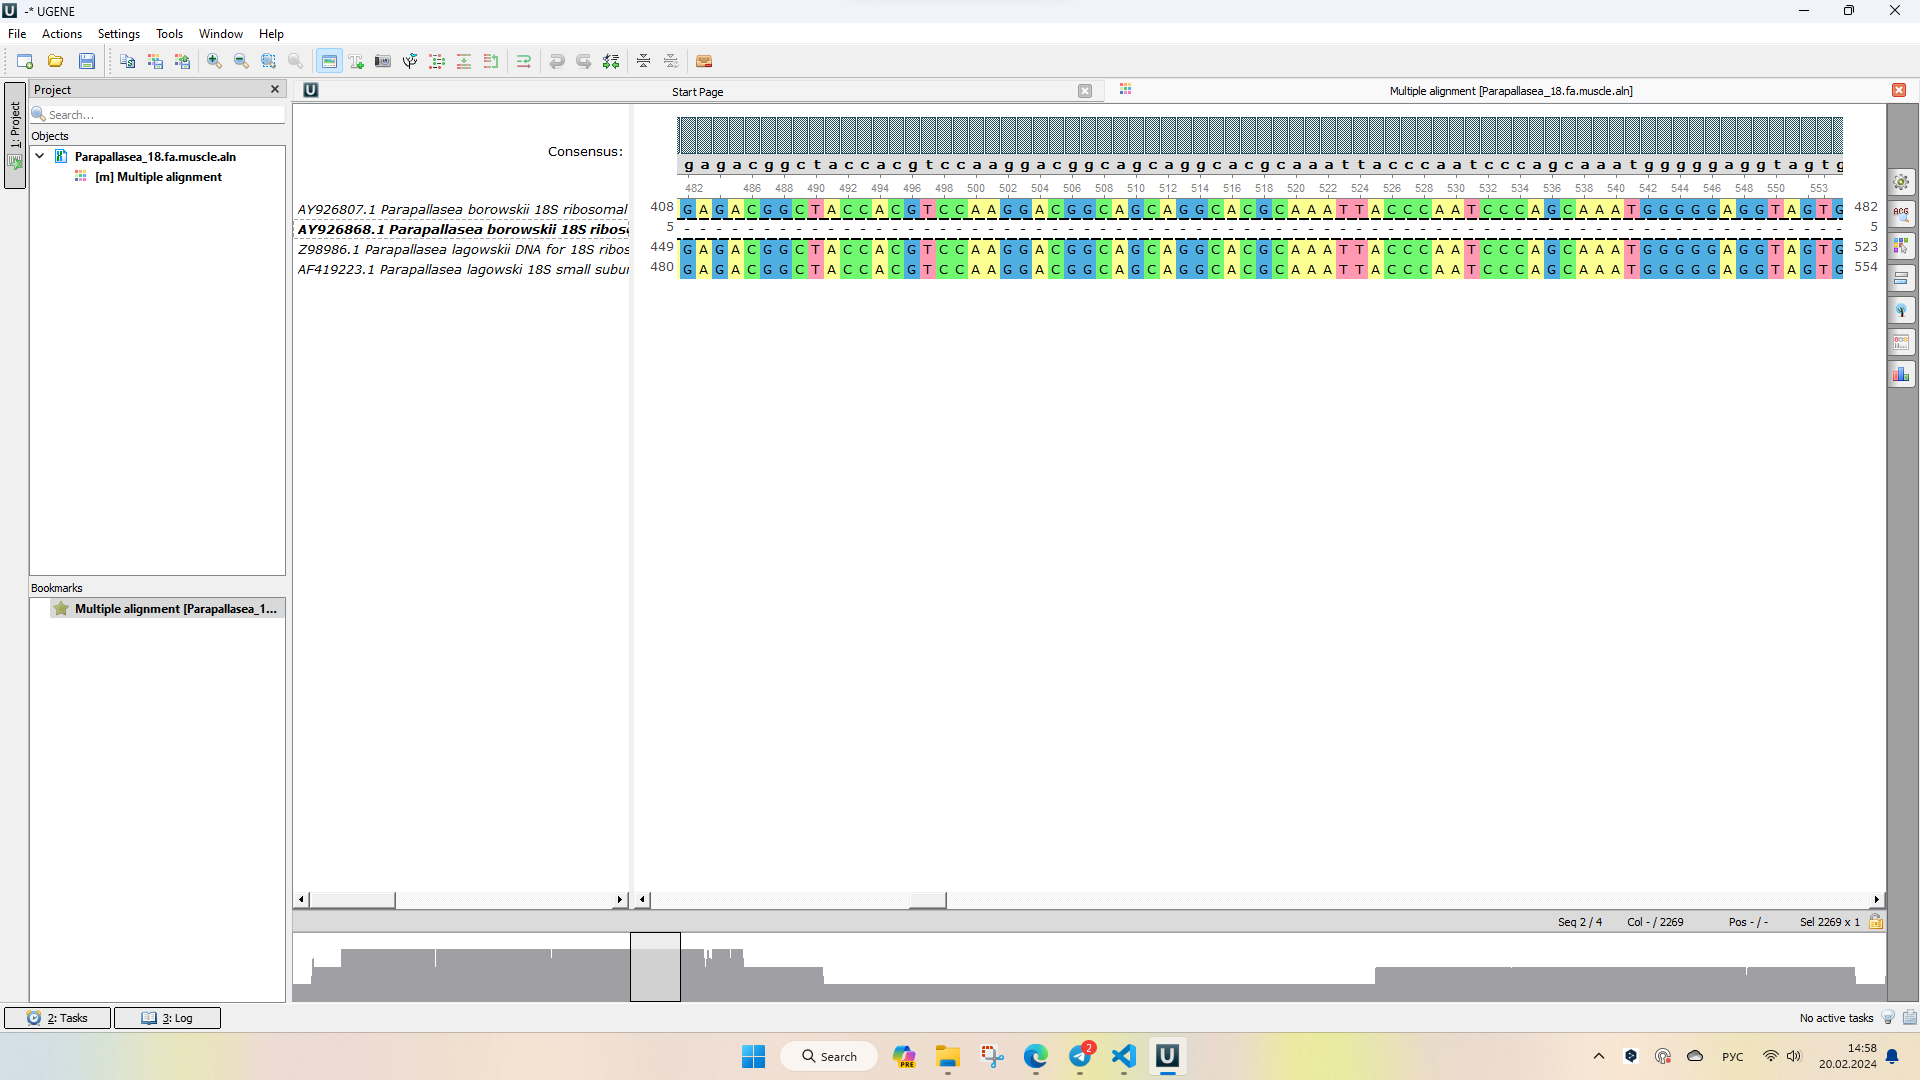
The beginning of a gene

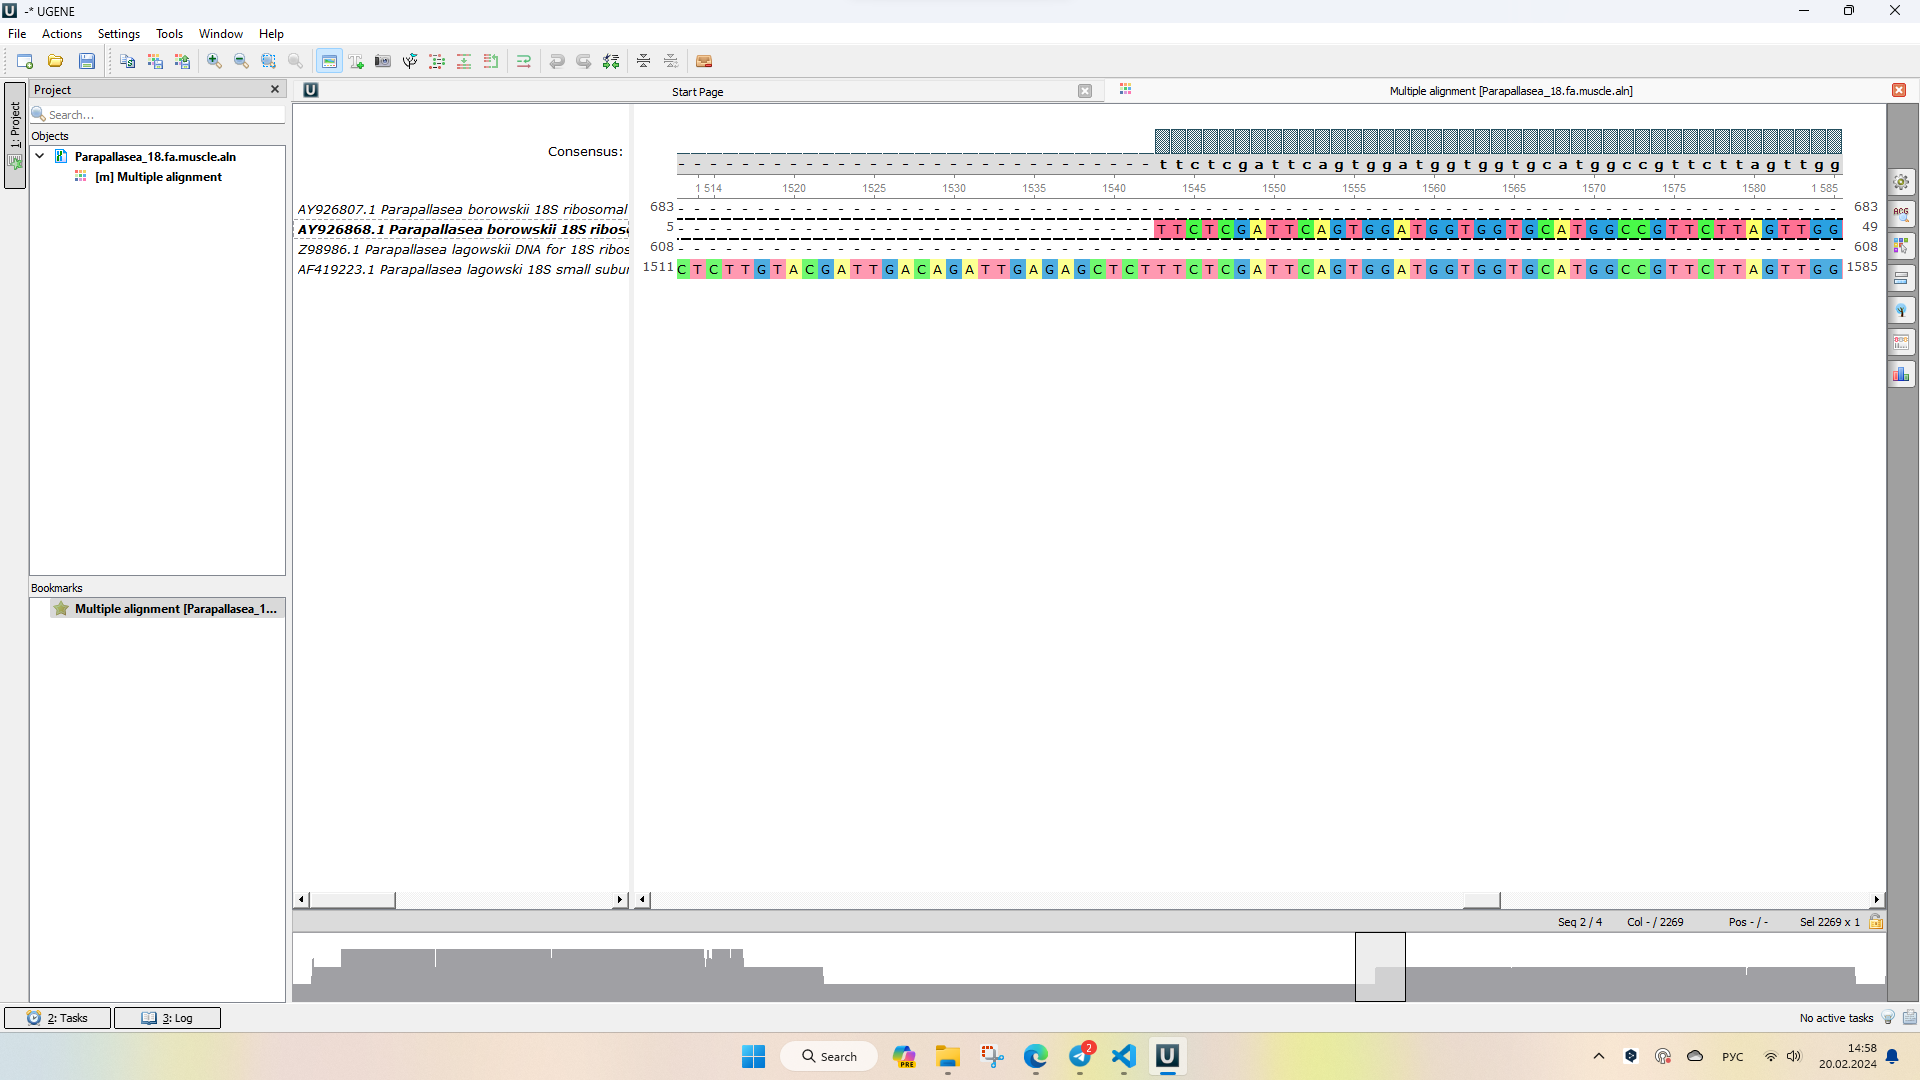
The end of the gene

In [9]:
! mafft --auto data/Parapallasea_18.fa > data/Parapallasea_18.fa.mafft.aln

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
All-to-all alignment.
tbfast-pair (nuc) Version 7.505
alg=L, model=DNA200 (2), 2.00 (6.00), -0.10 (-0.30), noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 4
done.

Progressive alignment ... 
STEP     3 /3 
done.
tbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
generating a scoring matrix for nucleotide (dist=200) ... done

    0 / 4
Segment   1/  1    1-2270
STEP 002-002-1  identical.    reject

### **12) Commands for creating a blast database from a set of Ommatogammarus_flavus_transcriptome_assembly.fa sequences, and for searching this database for the protein sequence Acanthogammarus_victorii_COI.faa and recording the results in a table (tab-separated text).** <a class="anchor" id="tvelveth-bullet"></a>
>Attention: the origin of the sequence is mitochondrial. What is important to consider when searching?<br />
>Extract the sequence with the best match into a separate file.

In [10]:
! makeblastdb -in data/Ommatogammarus_flavus_transcriptome_assembly.fa -dbtype nucl -parse_seqids



Building a new DB, current time: 02/20/2024 16:32:12
New DB name:   /home/ilia/MolPhylo2024_3_MSA/data/Ommatogammarus_flavus_transcriptome_assembly.fa
New DB title:  data/Ommatogammarus_flavus_transcriptome_assembly.fa
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /home/ilia/MolPhylo2024_3_MSA/data/Ommatogammarus_flavus_transcriptome_assembly.fa
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 100 sequences in 0.00619912 seconds.


The mitochondrial gene<br/>
Accordingly, the genetic code is different, and since here we are dealing with the communication between the protein query and the nucleotide base, it may matter. Not catastrophic here. But it is better to use the `-db_gencode 5` option, because this way the identity will be higher

In [11]:
! tblastn -query data/Acanthogammarus_victorii_COI.faa -db data/Ommatogammarus_flavus_transcriptome_assembly.fa -outfmt 6 -db_gencode 5
## fields: qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore

Acanthogammarus_victorii_COI	TRINITY_DN8878_c0_g1_i2	89.621	501	52	0	9	509	3	1505	0.0	781
Acanthogammarus_victorii_COI	TRINITY_DN58613_c0_g1_i1	50.000	20	9	1	206	225	32	88	6.3	20.8


Percentage of identity is **89.621**! Yay!

In [12]:
! blastdbcmd -db data/Ommatogammarus_flavus_transcriptome_assembly.fa -entry TRINITY_DN8878_c0_g1_i2 -out data/Ommatogammarus_flavus_COI.fa

In [13]:
! cat data/Ommatogammarus_flavus_COI.fa

>TRINITY_DN8878_c0_g1_i2 len=1505
CGACCAACCACAAAGATATTGGCACTCTTTATTTTATGCTAGGGCTCTGGTCTGGGTTAGTCGGAACCTCCATAAGACTT
ATCCTCCGCTCAGAACTTAGTGCGCCGGGTAGCCTGATTGGTGATGATCAACTGTATAACGTAATGGTAACCTCCCATGC
TTTTATTATAATTTTTTTTATAGTTATGCCTATCATAATTGGCGGGTTTGGTAACTGGCTGCTTCCTTTAATACTAGGTA
GACCTGATATAGCCTTCCCTCGAATAAACAACATGAGCTTTTGACTACTACCTCCTTCCCTTACACTTCTTATATCTAGA
AGCTTAGTAGAAAGAGGAGTCGGCACAGGTTGAACTGTCTACCCTCCTTTATCTGGGTCTACAGCCCATAGAGGTAGCGC
TGTAGATTTGGCTATTTTCTCACTTCATTTAGCCGGAGCTTCCTCTATCTTAGGGGCTGTAAATTTTATTTCTACCGCCA
TTAATATGCGAGCGCCTGGGATAAAATTAGACCAAATGCCTTTATTCGTCTGAGCTATTATTATTACTACCGTCCTCCTA
GTCTTATCCCTACCAGTCCTAGCTGGGGCCATTACGATACTACTTACAGACCGTAACATAAATACCTCTTTTTTTGACCC
TAGTGGGGGGGGTGACCCTATCCTATACCAACACTTATTTTGATTTTTTGGGCACCCAGAGGTGTATATTTTAATCCTGC
CTGCATTTGGCATAATCTCTCATATTGTTAGACAGGAGTCCGGTAAAAAAGAAACATTTGGCCCCCTAGGGATAATTTAT
GCTATATTAGCTATTGGGTTCCTCGGATTTATTGTGTGAGCCCATCATATGTTTACAGTCGGTATGGATGTAGATACCCG
AGCCTATTTTACATCAGCTACAATAATTATTGCAGTCCCCACCGGCATCAAAGTATTTAGGTGACTAGGTACTCT